# Лабораторная работа №8
##  Метод прогонки.
---  
### Цель: Исследовать решение стационарного одномерного уравнения теплопроводности, используя метода прогонки
---
#### Для исследования выберем Лаб раб 4, Вариант 3, Задание №7:  

$$
\begin{cases}
u(0) = 0; ~~~ u(1) = 1; ~~~ x_0 = \frac{1}{\sqrt{2}}, \\
k(x) = e^{\sin(x)}; ~~~ q(x) = 2; ~~~ f(x) = e^{x}, ~~~ x < x_0, \\
k(x) = 1; ~~~ q(x) = 1; ~~~ f(x) = e^{x}, ~~~ x > x_0, \\ 
\end{cases}
$$

Модельная задача:

$$
k(x) = k(x_0); ~~~ q(x) = q(x_0); ~~~ f(x) = f(x_0);
$$

---

#### Испорт модулей:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Объявление функций: 

In [2]:
def f(point):
    point_0 = point[0]
    point_1 = point[1]
    return np.array([point_1, point_1 * point_1 / (point_0 - 2)])

def rk_one_iter(f, point, step):
    k_1 = f(point)
    k_2 = f(point + step * k_1 / 2)
    k_3 = f(point + step * k_2 / 2)
    k_4 = f(point + step * k_3)    
    
    return point + step * (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6

def find_partial_derivatives(x_0, x_end, y_0, step):
    it_num = int((x_end - x_0) / step)

    x = np.zeros(it_num + 1)
    y = np.zeros((it_num + 1, 2))
    y[0] = y_0

    a_and_b = np.zeros((it_num + 1, 2))
    a_and_b[0] = np.array([0, 1])


    for i in range(it_num):
        y[i + 1] = rk_one_iter(f, y[i], step)
        y_i, u_i = y[i]

        den = y_i - 2

        df_dy = -(u_i * u_i) / (den * den)
        df_du = 2 * u_i / den

        def get_a_and_b(a_and_b):
            A, B = a_and_b
            return np.array([B, A * df_dy + B * df_du])

        a_and_b[i + 1] = rk_one_iter(get_a_and_b, a_and_b[i], step)
        x[i + 1] = x[i] + step

    A = a_and_b.T[0]
    return (y, A[-1])

def shooting_method(alpha_0, x_0, x_end, y_0, it_num):
    print('determine a step value: ')
    step = (x_end - x_0) / it_num
    print('\tstep : ' + str(step))
    
    print("----------------------------------")
    
    w_0 = np.array([y_0, alpha_0])
    res = find_partial_derivatives(x_0, x_end, w_0, step)
    solution = res[0]
    df = res[1]
    y = solution.T[0]

    L = y[-1]
    for i in range(it_num):
        alpha_0 -= L/df

        w_0 = np.array([y_0, alpha_0])
        res = find_partial_derivatives(x_0, x_end, w_0, step)
        solution = res[0]
        df = res[1]
        y = solution.T[0]

        L = y[-1]
    
    return y, alpha_0

#### Основная часть

Let's consider the following set of initial values
[0.25 0.5  1.   1.5  1.8  1.9  1.95]
----------------------------------
set the borders and an alpha param initial value:
	x_0 : 0
	x_end : 1
lpha_0 : 0
----------------------------------
We'll look for partial_derivatives via runge kutta method
----------------------------------
Current y_0: 
	y_0 : 0.25
----------------------------------
let's find a solution via the shooting method:
determine a step value: 
	step : 0.01
----------------------------------
calculated alpha : -0.23367993709292076
----------------------------------


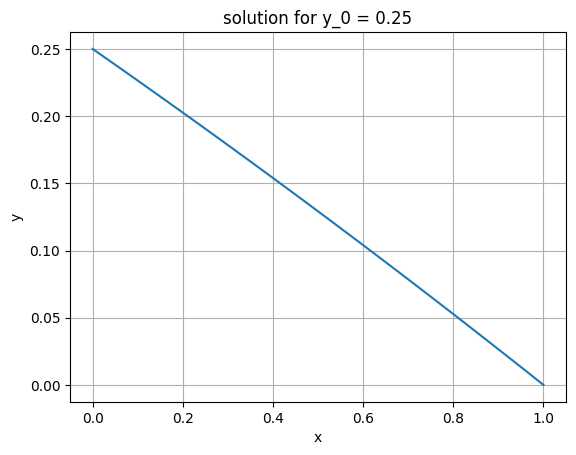

Current y_0: 
	y_0 : 0.5
----------------------------------
let's find a solution via the shooting method:
determine a step value: 
	step : 0.01
----------------------------------
calculated alpha : -0.43152310867791727
----------------------------------


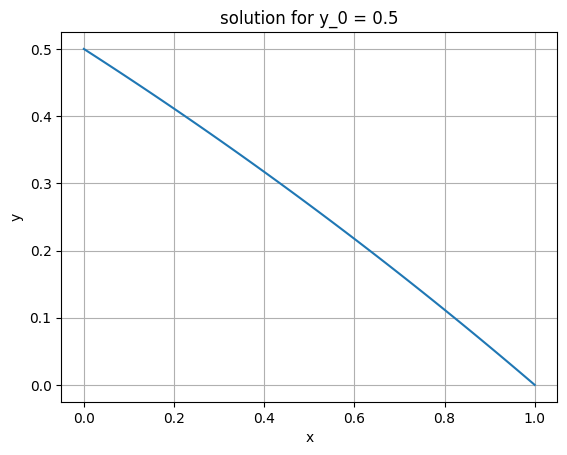

Current y_0: 
	y_0 : 1.0
----------------------------------
let's find a solution via the shooting method:
determine a step value: 
	step : 0.01
----------------------------------
calculated alpha : -0.693147180573202
----------------------------------


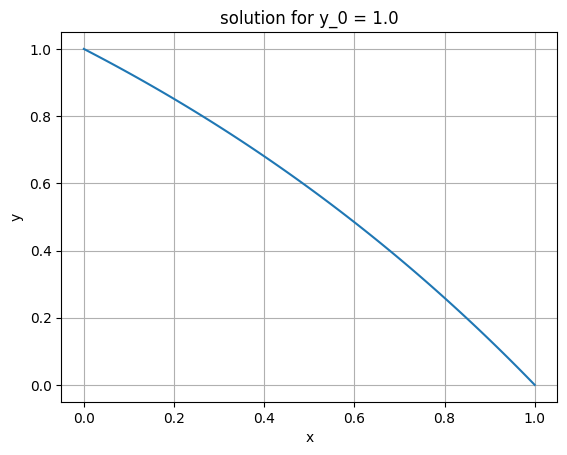

Current y_0: 
	y_0 : 1.5
----------------------------------
let's find a solution via the shooting method:
determine a step value: 
	step : 0.01
----------------------------------
calculated alpha : -0.6931471807708321
----------------------------------


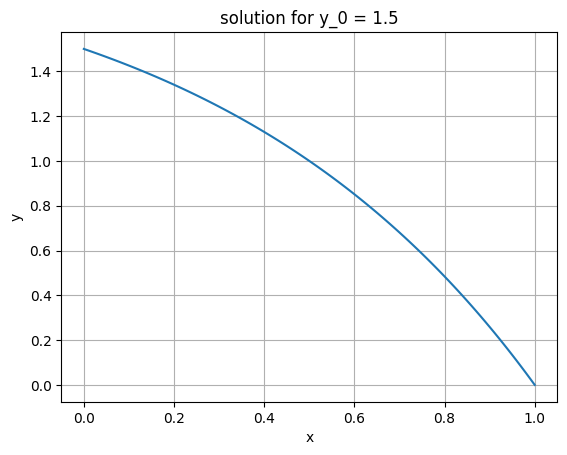

Current y_0: 
	y_0 : 1.8
----------------------------------
let's find a solution via the shooting method:
determine a step value: 
	step : 0.01
----------------------------------
calculated alpha : -0.46051701965707814
----------------------------------


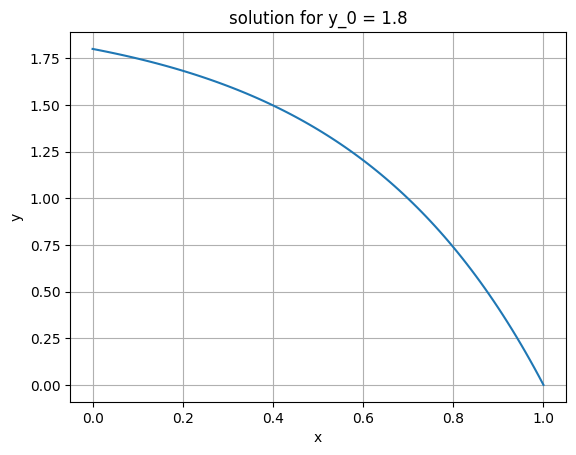

Current y_0: 
	y_0 : 1.9
----------------------------------
let's find a solution via the shooting method:
determine a step value: 
	step : 0.01
----------------------------------
calculated alpha : -0.2995732293164818
----------------------------------


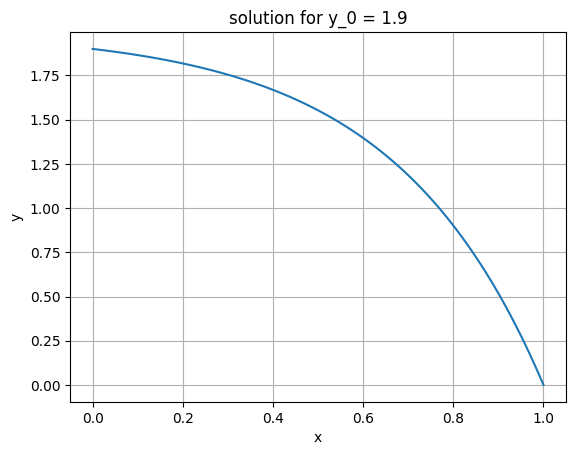

Current y_0: 
	y_0 : 1.95
----------------------------------
let's find a solution via the shooting method:
determine a step value: 
	step : 0.01
----------------------------------
calculated alpha : -0.18444397546574465
----------------------------------


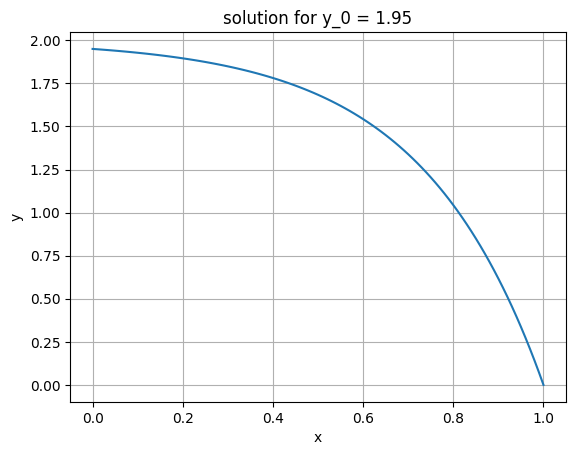

In [3]:
def main():

    print('Let\'s consider the following set of initial values')
    arr_y_0 = np.array([0.25, 0.5, 1, 1.5, 1.8, 1.9, 1.95])
    print(arr_y_0)

    print("----------------------------------")

    print('set the borders and an alpha param initial value:')
    x_0 = 0
    x_end = 1
    alpha_0 = 0
    print('\tx_0 : ' + str(x_0))
    print('\tx_end : ' + str(x_end))
    print('\alpha_0 : ' + str(alpha_0))

    print("----------------------------------")

    print('We\'ll look for partial_derivatives via runge kutta method')

    print("----------------------------------")
    for i in range (len(arr_y_0)):

        print('Current y_0: ')
        print('\ty_0 : ' + str(arr_y_0[i]))
        print("----------------------------------")

        print('let\'s find a solution via the shooting method:' )
        y, alpha = shooting_method(alpha_0, x_0, x_end, arr_y_0[i], 100)
        print('calculated alpha : ' + str(alpha))
        print("----------------------------------")

        x = np.linspace(x_0, x_end, 101)
        plt.plot(x, y)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('solution for y_0 = ' + str(arr_y_0[i]))
        plt.grid()
        plt.show()

main()

## Заключение
Подбор параметра $ \alpha $ с помощью метода Рунге Кутты и Метода Ньютона приводит к правильному решению системы. В этом случае метод стрельбы применяется успешно. 